In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import forestplot as fp
from matplotlib import pyplot

df = pd.read_excel(r'C:\Users\Tan Wei Cong\OneDrive - National University of Singapore\NUS\Systematic Review on Resistance Definitions\data extraction\coding\drugresistance_compiled.xlsx', sheet_name='data')

df1=df.query("included in (1,0)")

# Randomize the articles
df1 = df1.sample(frac=1, random_state=1) 
df_inc = df1[df1['included']==1]
df_exc = df1[df1['included']==0]

df_inc = df_inc.fillna('NA')

# Re-categorizing 'skin and soft tissue' infection into 'others'
df_inc = df_inc.replace(['skin and soft tissue'],'others') 

# Re-categorizing 'brain and meningeal' infection into 'others'
df_inc = df_inc.replace(['brain and meningeal'],'others') 

# Re-categorizing 'surgical site infection' infection into 'others'
df_inc = df_inc.replace(['surgical site infection'],'others') 

# Re-categorizing 'intraabdominal' infection into 'GI or intraabdominal'
df_inc = df_inc.replace(['intraabdominal'],'GI or intraabdominal') 

#Re-categorizing articles with 'others' infection into 'GI or intraabdominal' infection based on keywords from comments
gastrolist = df_inc[df_inc['comment'].str.contains('GI|gastro|enteritis|Gastro|Typhoid|typhoid|typhi|Typhi|salmonella|Salmonella|Shigella|shigella|shigellosis|Shigellosis|diarrhea|Diarrhea|diarrhoea|Diarrhoea|Helicobacter|helicobacter|campylobacter|Campylobacter')]
for i in list(gastrolist.index):
    if df_inc.loc[i]['infection_type'] == 'others':
        df_inc.loc[i,'infection_type'] = 'GI or intraabdominal'
    else:
        continue

# Creating dataframe for included articles only
df_inc = df_inc.astype({'year': 'int64',
                        'mdr_definition': 'int64','xdr_definition': 'int64','pdr_definition': 'int64','dtr_definition': 'int64','udr_definition': 'int64',
                        'usedinmethod': 'int64','usedinresult': 'int64'})
df_inc.head(5)

,number,title,year,journal,included,exclude_reason,extractionby,country,study_type,study_population,...,clsi_susceptguide,others_susceptguide,saureus_organism,enterococcus_organism,enterobacterales_organism,paeru_organism,abaum_organism,other_organism,other_organism_specify,comment
16361,16362,Postoperative antimicrobials after lung transp...,2016,Clinical Transplantation,1,NA,yl,United States,observational,human,...,NA,NA,0.0,0.0,0.0,0.0,0.0,1.0,Clostridium difficile,NA
5211,5212,Molecular epidemiology of the endemic multires...,2018,Food Microbiology,1,NA,yl,Hungary,observational,human-animal,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NA,Genomics
13060,13061,Serotypes and clonal diversity of streptococcu...,2016,PLoS ONE,1,NA,aw,Spain,observational,human,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Streptococcus pneumoniae,NA
2092,2093,Risk factors and outcomes associated with mult...,2018,Antimicrobial Agents and Chemotherapy,1,NA,ds,United States,observational,human,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NA,NA
2830,2831,"Prevalence, Serotype Distribution and Antimicr...",2022,Frontiers in Cellular and Infection Microbiology,1,NA,ds,China,observational,human,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NA,"""multidrug resistance (MDR, resistant to at le..."


In [3]:
### Summary Trend - Variable 1 (Inclusion vs Exclusion) ###

var1 = list(set(df1['included'].to_list()))
print(var1)
i = 100

# Creating dataframe for plotting proportions over number of articles screened

data1temp = []
while i < df1['included'].shape[0]:
    for v in var1:
        count = df1.iloc[:i][df1['included'] == v].shape[0]
        proportion = round((count/i*100),2)
        data1temp.append([i,v,count,proportion])
    i = i + 100

for v in var1:
    count = df1[df1['included'] == v].shape[0]
    proportion = round((count/df1.shape[0]*100),2)
    data1temp.append([df1.shape[0],v,count,proportion])
data1temp = pd.DataFrame(data1temp,columns=['Number of articles','Variable','Count','Proportion'])
data1temp['Variable'] = data1temp['Variable'].replace([1],'Included')
data1temp['Variable'] = data1temp['Variable'].replace([0],'Excluded')

# Pivot long to wide data for proportions
data1=data1temp.pivot(index='Number of articles',columns='Variable')['Proportion']

data1.tail(3)

[0, 1]


Variable,Excluded,Included
Number of articles,,
5000,58.80,41.20
5100,58.84,41.16
5191,58.87,41.13


In [4]:
### Summary Trend - Variable 2 (Exclusion Reasons) ###

i=100
var2 = list(set(df_exc['exclude_reason'].to_list()))
print(var2)

# Creating dataframe for plotting proportions over number of articles screened

data2temp=[]
while i < df_exc['exclude_reason'].shape[0]:
    for v in var2:
        count = df_exc.iloc[:i][df_exc['exclude_reason'] == v].shape[0]
        proportion = round((count/i*100),2)
        data2temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
for v in var2:
    count = df_exc[df_exc['exclude_reason'] == v].shape[0]
    proportion = round((count/df_exc.shape[0]*100),2)
    data2temp.append([df_exc['exclude_reason'].shape[0],str.capitalize(v),count,proportion])
data2temp = pd.DataFrame(data2temp,columns=['Number of articles','Variable','Count','Proportion'])

#Pivot long to wide data for proportions
data2=data2temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data2.rename(columns = {'No human implications':'No relevance to human health','Review-editorial-opinion':'Review/editorials/commentaries',
                       'Non-bacterial infection':'Virus/fungus/TB/parasites','Not english':'Not in English',
                        'Terms not used':'Drug resistance terms not included in methods or results sections'}, inplace = True)

data2.tail(3)

['no full article found', 'non-bacterial infection', 'not English', 'review-editorial-opinion', 'no human implications', 'terms not used']


Variable,No full article found,No relevance to human health,Virus/fungus/TB/parasites,Not in English,Review/editorials/commentaries,Drug resistance terms not included in methods or results sections
Number of articles,,,,,,
2900,17.07,0.52,0.48,1.45,35.90,44.59
3000,17.03,0.53,0.47,1.43,35.80,44.73
3056,17.15,0.56,0.49,1.44,35.67,44.70


In [5]:
### Summary Trend - Variable 3 (Study Types) ###

i=100
var3 = list(set(df_inc['study_type'].to_list()))
print(var3)

# Creating dataframe for plotting proportions over number of articles screened

data3temp=[]
while i < df_inc['study_type'].shape[0]:
    for v in var3:
        count = df_inc.iloc[:i][df_inc['study_type'] == v].shape[0]
        proportion = round((count/i*100),2)
        data3temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
for v in var3:
    count = df_inc[df_inc['study_type'] == v].shape[0]
    proportion = round((count/df_inc.shape[0]*100),2)
    data3temp.append([df_inc['study_type'].shape[0],str.capitalize(v),count,proportion])
data3temp = pd.DataFrame(data3temp,columns=['Number of articles','Variable','Count','Proportion'])

# Pivot long to wide data for proportions

data3=data3temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data3.rename(columns = {'In vitro experiment':'$\it{in}$ $\it{vitro}$ Experiment', 
                        'Systematic review/metaanalysis':'Systematic review/meta-analysis'}, inplace = True)

print(data3temp.tail(5))
data3.tail(2)

['observational', 'in vitro experiment', 'systematic review/metaanalysis', 'interventional']
    Number of articles                        Variable  Count  Proportion
83                2100                  Interventional     47        2.24
84                2135                   Observational   1899       88.95
85                2135             In vitro experiment    114        5.34
86                2135  Systematic review/metaanalysis     74        3.47
87                2135                  Interventional     48        2.25


Variable,$\it{in}$ $\it{vitro}$ Experiment,Interventional,Observational,Systematic review/meta-analysis
Number of articles,,,,
2100,5.38,2.24,88.86,3.52
2135,5.34,2.25,88.95,3.47


In [6]:
### Summary Trend - Variable 4 (Study Populations) ###

#Combining unknown and NA into single category "Not specified"

df_inc['study_population'] = df_inc['study_population'].replace(['NA'],'unknown')

i=100
var4 = list(set(df_inc['study_population'].to_list()))
print(var4)

# Creating dataframe for plotting proportions over number of articles screened

data4temp=[]
while i < df_inc['study_population'].shape[0]:
    for v in var4:
        count = df_inc.iloc[:i][df_inc['study_population'] == v].shape[0]
        proportion = round((count/i*100),2)
        data4temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
for v in var4:
    count = df_inc[df_inc['study_population'] == v].shape[0]
    proportion = round((count/df_inc.shape[0]*100),2)
    data4temp.append([df_inc['study_population'].shape[0],str.capitalize(v),count,proportion])
data4temp = pd.DataFrame(data4temp,columns=['Number of articles','Variable','Count','Proportion'])
data4temp['Variable'] = data4temp['Variable'].replace(['Unknown'],'Not specified')

# Pivot long to wide data for proportions

data4=data4temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data4.rename(columns = {'Animal-envir':'Animal-Environment','Human-animal-envir':'Human-animal-environment',
                       'Human-envir':'Human-environment'}, inplace = True)

data4.tail(2)

['human-envir', 'human', 'environment', 'animal-envir', 'human-animal-envir', 'unknown', 'animal', 'human-animal']


Variable,Animal,Animal-Environment,Environment,Human,Human-animal,Human-animal-environment,Human-environment,Not specified
Number of articles,,,,,,,,
2100,4.38,0.86,7.52,75.14,2.10,1.14,2.52,6.33
2135,4.40,0.84,7.54,75.22,2.06,1.17,2.53,6.23


In [7]:
### Summary Trend - Variable 5 (Drug Resistance Terms) ###
i=100

# Creating dataframe for plotting proportions over number of articles screened

data5temp=[]
while i < df_inc['mdr_definition'].shape[0]:
    countm = df_inc.iloc[:i][df_inc['mdr_definition'] == 1].shape[0]
    tempproportionm = round((countm/i*100),2)

    countx = df_inc.iloc[:i][df_inc['xdr_definition'] == 1].shape[0]
    tempproportionx = round((countx/i*100),2)

    countp = df_inc.iloc[:i][df_inc['pdr_definition'] == 1].shape[0]
    tempproportionp = round((countp/i*100),2)

    countd = df_inc.iloc[:i][df_inc['dtr_definition'] == 1].shape[0]
    tempproportiond = round((countd/i*100),2)

    countu = df_inc.iloc[:i][df_inc['udr_definition'] == 1].shape[0]
    tempproportionu = round((countu/i*100),2)

    totalproportion = tempproportionm + tempproportionx + tempproportionp + tempproportiond + tempproportionu

    proportionm = round(tempproportionm/totalproportion*100,2)
    proportionx = round(tempproportionx/totalproportion*100,2)
    proportionp = round(tempproportionp/totalproportion*100,2)
    proportiond = round(tempproportiond/totalproportion*100,2)
    proportionu = round(tempproportionu/totalproportion*100,2)
    data5temp.append([i,'MDR',countm,proportionm])
    data5temp.append([i,'XDR',countx,proportionx])
    data5temp.append([i,'PDR',countp,proportionp])
    data5temp.append([i,'DTR',countd,proportiond])
    data5temp.append([i,'UDR',count,proportionu])
    i = i + 100
    
countm = df_inc[df_inc['mdr_definition'] == 1].shape[0]
tempproportionm = round((countm/df_inc.shape[0]*100),2)
    
countx = df_inc[df_inc['xdr_definition'] == 1].shape[0]
tempproportionx = round((countx/df_inc.shape[0]*100),2)
    
countp = df_inc[df_inc['pdr_definition'] == 1].shape[0]
tempproportionp = round((countp/df_inc.shape[0]*100),2)
    
countd = df_inc[df_inc['dtr_definition'] == 1].shape[0]
tempproportiond = round((countd/df_inc.shape[0]*100),2)
    
countu = df_inc[df_inc['udr_definition'] == 1].shape[0]
tempproportionu = round((countu/df_inc.shape[0]*100),2)
totalproportion = tempproportionm + tempproportionx + tempproportionp + tempproportiond + tempproportionu
proportionm = round(tempproportionm/totalproportion*100,2)
proportionx = round(tempproportionx/totalproportion*100,2)
proportionp = round(tempproportionp/totalproportion*100,2)
proportiond = round(tempproportiond/totalproportion*100,2)
proportionu = round(tempproportionu/totalproportion*100,2)
data5temp.append([df_inc['mdr_definition'].shape[0],'MDR',countm,proportionm])
data5temp.append([df_inc['xdr_definition'].shape[0],'XDR',countx,proportionx])
data5temp.append([df_inc['pdr_definition'].shape[0],'PDR',countp,proportionp])
data5temp.append([df_inc['dtr_definition'].shape[0],'DTR',countd,proportiond])
data5temp.append([df_inc['udr_definition'].shape[0],'UDR',count,proportionu])
data5temp = pd.DataFrame(data5temp,columns=['Number of articles','Variable','Count','Proportion'])

# Pivot long to wide data for proportions

data5=data5temp.pivot(index='Number of articles',columns='Variable')['Proportion']
print(data5temp.tail(6))
data5.tail(2)

     Number of articles Variable  Count  Proportion
104                2100      UDR     44        0.11
105                2135      MDR   2078       79.40
106                2135      XDR    342       13.07
107                2135      PDR    180        6.88
108                2135      DTR     14        0.54
109                2135      UDR     44        0.11


Variable,DTR,MDR,PDR,UDR,XDR
Number of articles,,,,,
2100,0.55,79.38,6.87,0.11,13.08
2135,0.54,79.40,6.88,0.11,13.07


In [8]:
### Summary Trend - Variable 6 (Drug Resistance Definition and Citation) ###

i=100
var6 = list(set(df_inc['cite_definition'].to_list()))
print(var6)

# Creating dataframe for plotting proportions over number of articles screened

data6temp=[]
while i < df_inc['cite_definition'].shape[0]:
    for v in var6:
        count = df_inc.iloc[:i][df_inc['cite_definition'] == v].shape[0]
        proportion = round((count/i*100),2)
        data6temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
for v in var6:
    count = df_inc[df_inc['cite_definition'] == v].shape[0]
    proportion = round((count/df_inc.shape[0]*100),2)
    data6temp.append([df_inc['cite_definition'].shape[0],str.capitalize(v),count,proportion])
data6temp = pd.DataFrame(data6temp,columns=['Number of articles','Variable','Count','Proportion'])

# Pivot long to wide data for proportions

data6=data6temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data6.rename(columns = {'Cited magiorakos 2011':'Magiorakos 2011 definition (cited)',
                        'Not cited but same definition':'Magiorakos 2011 definition (not cited)',
                        'Not cited different definition':'Other definitions',
                        'Not cited without clear definition':'No clear definitions'}, inplace = True)

data6.tail(2)

['not cited without clear definition', 'cited Magiorakos 2011', 'not cited but same definition', 'not cited different definition']


Variable,Magiorakos 2011 definition (cited),Magiorakos 2011 definition (not cited),Other definitions,No clear definitions
Number of articles,,,,
2100,36.62,20.14,8.29,34.95
2135,36.63,20.19,8.29,34.89


In [9]:
### Summary Trend - Variable 7 (Sections with Drug Resistance Terms) ###

# Melting data from wide format to long format 

section = []
for x in list(zip(df_inc['usedinmethod'],df_inc['usedinresult'])):
    if x == (1,0):
        section.append('methods only')
    elif x == (0,1):
        section.append('results only')
    else:
        section.append('methods & results')
df_inc['section'] = section

# Creating dataframe for plotting proportions over number of articles screened

i=100
var7 = list(set(df_inc['section'].to_list()))
data7temp=[]
while i < df_inc['section'].shape[0]:
    for v in var7:
        count = df_inc.iloc[:i][df_inc['section'] == v].shape[0]
        proportion = round((count/i*100),2)
        data7temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
for v in var7:
    count = df_inc[df_inc['section'] == v].shape[0]
    proportion = round((count/df_inc.shape[0]*100),2)
    data7temp.append([df_inc['section'].shape[0],str.capitalize(v),count,proportion])
data7temp = pd.DataFrame(data7temp,columns=['Number of articles','Variable','Count','Proportion'])

# Pivot long to wide data for proportions

data7=data7temp.pivot(index='Number of articles',columns='Variable')['Proportion']

data7.tail(2)

Variable,Methods & results,Methods only,Results only
Number of articles,,,
2100,58.52,7.57,33.90
2135,58.41,7.54,34.05


In [10]:
### Summary Trend - Variable 8 (Sample Sites) ###

# Dropping missing data and removing 'NA' category - 'NA' refers to isolates obtained from environment

df_inc_site = df_inc[(df_inc['sample_site'] != 'NA') & (df_inc['sample_site'] != 'missing')]
i=100
var8 = list(set(df_inc_site['sample_site'].to_list()))
print(var8)

# Creating dataframe for plotting proportions over number of articles screened

data8temp=[]
while i < df_inc_site.shape[0]:
    for v in var8:
        count = df_inc_site.iloc[:i][df_inc_site['sample_site'] == v].shape[0]
        proportion = round((count/i*100),2)
        data8temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
    
for v in var8:
    count = df_inc_site[df_inc_site['sample_site'] == v].shape[0]
    proportion = round((count/df_inc_site.shape[0]*100),2)
    data8temp.append([df_inc_site.shape[0],str.capitalize(v),count,proportion])
data8temp = pd.DataFrame(data8temp,columns=['Number of articles','Variable','Count','Proportion'])
data8temp['Variable'] = data8temp['Variable'].replace(['Both'],'Clinical & screening')

# Pivot long to wide data for proportions

data8=data8temp.pivot(index='Number of articles',columns='Variable')['Proportion']
print(data8temp.tail(4))
data8.tail(2)

['clinical', 'screening (colonisation)', 'both']
    Number of articles                  Variable  Count  Proportion
50                1700      Clinical & screening     83        4.88
51                1800                  Clinical   1430       79.44
52                1800  Screening (colonisation)    281       15.61
53                1800      Clinical & screening     89        4.94


Variable,Clinical,Clinical & screening,Screening (colonisation)
Number of articles,,,
1700,79.35,4.88,15.76
1800,79.44,4.94,15.61


In [11]:
### Summary Trend - Variable 9 (Infection Types) ### 

# Dropping missing data and removing 'NA' category - 'NA' refers to isolates obtained from screening (colonisation)

df_inc_inf = df_inc[(df_inc['infection_type'] != 'NA') & (df_inc['infection_type'] != 'missing')] 
df_inc_inf['infection_type'] = df_inc_inf['infection_type'].replace(['combination'],'others') #combining combination and others into single category "Other infections"

i=100
var9 = list(set(df_inc_inf['infection_type'].to_list()))
print(var9)

# Creating dataframe for plotting proportions over number of articles screened

data9temp=[]
while i < df_inc_inf['infection_type'].shape[0]:
    for v in var9:
        count = df_inc_inf.iloc[:i][df_inc_inf['infection_type'] == v].shape[0]
        proportion = round((count/i*100),2)
        data9temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
for v in var9:
    count = df_inc_inf[df_inc_inf['infection_type'] == v].shape[0]
    proportion = round((count/df_inc_inf.shape[0]*100),2)
    data9temp.append([df_inc_inf['infection_type'].shape[0],str.capitalize(v),count,proportion])
data9temp = pd.DataFrame(data9temp,columns=['Number of articles','Variable','Count','Proportion'])

# Pivot long to wide data for proportions

data9=data9temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data9.rename(columns = {'Respiratory':'Respiratory tract',
                        'Gi or intraabdominal':'Gastrointestinal tract',
                        'Urinary':'Urinary tract','Others':'Other infection source'}, inplace = True)

print(data9temp.tail(5))
data9.tail(2)

['urinary', 'respiratory', 'others', 'GI or intraabdominal', 'bloodstream']
    Number of articles              Variable  Count  Proportion
75                1526               Urinary    151        9.90
76                1526           Respiratory    132        8.65
77                1526                Others    944       61.86
78                1526  Gi or intraabdominal    111        7.27
79                1526           Bloodstream    188       12.32


Variable,Bloodstream,Gastrointestinal tract,Other infection source,Respiratory tract,Urinary tract
Number of articles,,,,,
1500,12.07,7.33,61.87,8.80,9.93
1526,12.32,7.27,61.86,8.65,9.90


In [12]:
### Summary Trend - Variable 10 (Drug Resistance Typing Methods) ###

# Melting data from wide format to long format

typing = []
for x in list(zip(df_inc['genotype_resistance'],df_inc['phenotype_resistance'])):
    if x == (1,0):
        typing.append('genotype only')
    elif x == (0,1):
        typing.append('phenotype only')
    elif x == (1,1):
        typing.append('genotype & phenotype')
    else:
        typing.append('no typing done')
df_inc['typing'] = typing

i=100
var10 = list(set(df_inc['typing'].to_list()))

# Creating dataframe for plotting proportions over number of articles screened

data10temp=[]
while i < df_inc['typing'].shape[0]:
    for v in var10:
        count = df_inc.iloc[:i][df_inc['typing'] == v].shape[0]
        proportion = round((count/i*100),2)
        data10temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
for v in var10:
    count = df_inc[df_inc['typing'] == v].shape[0]
    proportion = round((count/df_inc.shape[0]*100),2)
    data10temp.append([df_inc['typing'].shape[0],str.capitalize(v),count,proportion])
data10temp = pd.DataFrame(data10temp,columns=['Number of articles','Variable','Count','Proportion'])

# Pivot long to wide data for proportions

data10=data10temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data10.rename(columns = {'No typing done':'Not specified'})
print(data10temp.tail(5))
data10.tail(2)

    Number of articles              Variable  Count  Proportion
83                2100        No typing done    208        9.90
84                2135         Genotype only     88        4.12
85                2135  Genotype & phenotype    820       38.41
86                2135        Phenotype only   1014       47.49
87                2135        No typing done    213        9.98


Variable,Genotype & phenotype,Genotype only,No typing done,Phenotype only
Number of articles,,,,
2100,38.57,4.10,9.90,47.43
2135,38.41,4.12,9.98,47.49


In [13]:
### Summary Trend - Variable 11 (Susceptibility Guidelines) ###

# Melting data from wide format to long format

susguide = []
for x in list(zip(df_inc['eucast_susceptguide'],df_inc['clsi_susceptguide'],df_inc['others_susceptguide'])):
    if x == (1,0,0):
        susguide.append('eucast only')
    elif x == (0,1,0):
        susguide.append('clsi only')
    elif x == (1,1,0):
        susguide.append('eucast & clsi')
    elif x == (0,0,1):
        susguide.append('other guidelines')
    else:
        susguide.append('no guidelines specified')
df_inc['susguide'] = susguide

i=100
var11 = list(set(df_inc['susguide'].to_list()))
print(var11)

# Creating dataframe for plotting proportions over number of articles screened

data11temp=[]
while i < df_inc['susguide'].shape[0]:
    for v in var11:
        count = df_inc.iloc[:i][df_inc['susguide'] == v].shape[0]
        proportion = round((count/i*100),2)
        data11temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
for v in var11:
    count = df_inc[df_inc['susguide'] == v].shape[0]
    proportion = round((count/df_inc.shape[0]*100),2)
    data11temp.append([df_inc['susguide'].shape[0],str.capitalize(v),count,proportion])
data11temp = pd.DataFrame(data11temp,columns=['Number of articles','Variable','Count','Proportion'])

# Pivot long to wide data for proportions

data11=data11temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data11.rename(columns={'Clsi only': 'CLSI only','Eucast & clsi':'EUCAST & CLSI','Eucast only':'EUCAST only'}, inplace=True)
print(data11temp.tail(5))
data11.tail(3)

['other guidelines', 'no guidelines specified', 'eucast only', 'eucast & clsi', 'clsi only']
     Number of articles                 Variable  Count  Proportion
105                2135         Other guidelines     58        2.72
106                2135  No guidelines specified    590       27.63
107                2135              Eucast only    229       10.73
108                2135            Eucast & clsi    155        7.26
109                2135                Clsi only   1103       51.66


Variable,CLSI only,EUCAST & CLSI,EUCAST only,No guidelines specified,Other guidelines
Number of articles,,,,,
2000,52.00,7.20,10.50,27.65,2.65
2100,51.86,7.29,10.71,27.43,2.71
2135,51.66,7.26,10.73,27.63,2.72


In [14]:
### Summary Trend - Variable 12 (Microorganisms) ###

# Creating dataframe for plotting proportions over number of articles screened

i=100
data12temp=[]
while i < df_inc['saureus_organism'].shape[0]:
    counts = df_inc.iloc[:i][df_inc['saureus_organism'] == 1].shape[0]
    tempproportions = round((counts/i*100),2)
    
    countec = df_inc.iloc[:i][df_inc['enterococcus_organism'] == 1].shape[0]
    tempproportionec = round((countec/i*100),2)
    
    counteb = df_inc.iloc[:i][df_inc['enterobacterales_organism'] == 1].shape[0]
    tempproportioneb = round((counteb/i*100),2)
    
    countp = df_inc.iloc[:i][df_inc['paeru_organism'] == 1].shape[0]
    tempproportionp = round((countp/i*100),2)
    
    countab = df_inc.iloc[:i][df_inc['abaum_organism'] == 1].shape[0]
    tempproportionab = round((countab/i*100),2)
    
    counto = df_inc.iloc[:i][df_inc['other_organism'] == 1].shape[0]
    tempproportiono = round((counto/i*100),2)
    
    #Normalising proportions
    
    totalproportion = tempproportions + tempproportionec + tempproportioneb + tempproportionp + tempproportionab + tempproportiono
    proportions = round(tempproportions/totalproportion*100,2)
    proportionec = round(tempproportionec/totalproportion*100,2)
    proportioneb = round(tempproportioneb/totalproportion*100,2)
    proportionp = round(tempproportionp/totalproportion*100,2)
    proportionab = round(tempproportionab/totalproportion*100,2)
    proportiono = round(tempproportiono/totalproportion*100,2)
    data12temp.append([i,'$\it{Staphylococcus}$ $\it{aureus}$',counts,proportions])
    data12temp.append([i,'$\it{Enterococcus}$ spp.',countec,proportionec])
    data12temp.append([i,'Enterobacterales',counteb,proportioneb])
    data12temp.append([i,'$\it{Pseudomonas}$ spp.',countp,proportionp])
    data12temp.append([i,'$\it{Acinetobacter}$ spp.',countab,proportionab])
    data12temp.append([i,'Others',counto,proportiono])
    i = i + 100
    
counts = df_inc.iloc[:i][df_inc['saureus_organism'] == 1].shape[0]
tempproportions = round((counts/df_inc.shape[0]*100),2)
    
countec = df_inc.iloc[:i][df_inc['enterococcus_organism'] == 1].shape[0]
tempproportionec = round((countec/df_inc.shape[0]*100),2)
    
counteb = df_inc.iloc[:i][df_inc['enterobacterales_organism'] == 1].shape[0]
tempproportioneb = round((counteb/df_inc.shape[0]*100),2)
    
countp = df_inc.iloc[:i][df_inc['paeru_organism'] == 1].shape[0]
tempproportionp = round((countp/df_inc.shape[0]*100),2)
    
countab = df_inc.iloc[:i][df_inc['abaum_organism'] == 1].shape[0]
tempproportionab = round((countab/df_inc.shape[0]*100),2)
    
counto = df_inc.iloc[:i][df_inc['other_organism'] == 1].shape[0]
tempproportiono = round((counto/df_inc.shape[0]*100),2)
    
totalproportion = tempproportions + tempproportionec + tempproportioneb + tempproportionp + tempproportionab + tempproportiono
proportions = round(tempproportions/totalproportion*100,2)
proportionec = round(tempproportionec/totalproportion*100,2)
proportioneb = round(tempproportioneb/totalproportion*100,2)
proportionp = round(tempproportionp/totalproportion*100,2)
proportionab = round(tempproportionab/totalproportion*100,2)
proportiono = round(tempproportiono/totalproportion*100,2)
data12temp.append([df_inc['saureus_organism'].shape[0],'$\it{Staphylococcus}$ $\it{aureus}$',counts,proportions])
data12temp.append([df_inc['enterococcus_organism'].shape[0],'$\it{Enterococcus}$ spp.',countec,proportionec])
data12temp.append([df_inc['enterobacterales_organism'].shape[0],'Enterobacterales',counteb,proportioneb])
data12temp.append([df_inc['paeru_organism'].shape[0],'$\it{Pseudomonas}$ spp.',countp,proportionp])
data12temp.append([df_inc['abaum_organism'].shape[0],'$\it{Acinetobacter}$ spp.',countab,proportionab])
data12temp.append([df_inc['other_organism'].shape[0],'Others',counto,proportiono])
data12temp = pd.DataFrame(data12temp,columns=['Number of articles','Variable','Count','Proportion'])

# Pivot long to wide data for proportions

data12=data12temp.pivot(index='Number of articles',columns='Variable')['Proportion']
print(data12temp.tail(6))
data12.tail(3)

     Number of articles                             Variable  Count  \
126                2135  $\it{Staphylococcus}$ $\it{aureus}$    488   
127                2135             $\it{Enterococcus}$ spp.    283   
128                2135                     Enterobacterales   1228   
129                2135              $\it{Pseudomonas}$ spp.    586   
130                2135            $\it{Acinetobacter}$ spp.    517   
131                2135                               Others    564   

     Proportion  
126       13.31  
127        7.72  
128       33.49  
129       15.98  
130       14.10  
131       15.38  


Variable,$\it{Acinetobacter}$ spp.,$\it{Enterococcus}$ spp.,$\it{Pseudomonas}$ spp.,$\it{Staphylococcus}$ $\it{aureus}$,Enterobacterales,Others
Number of articles,,,,,,
2000,14.10,7.69,16.13,13.34,33.65,15.09
2100,14.12,7.67,16.11,13.31,33.50,15.28
2135,14.10,7.72,15.98,13.31,33.49,15.38


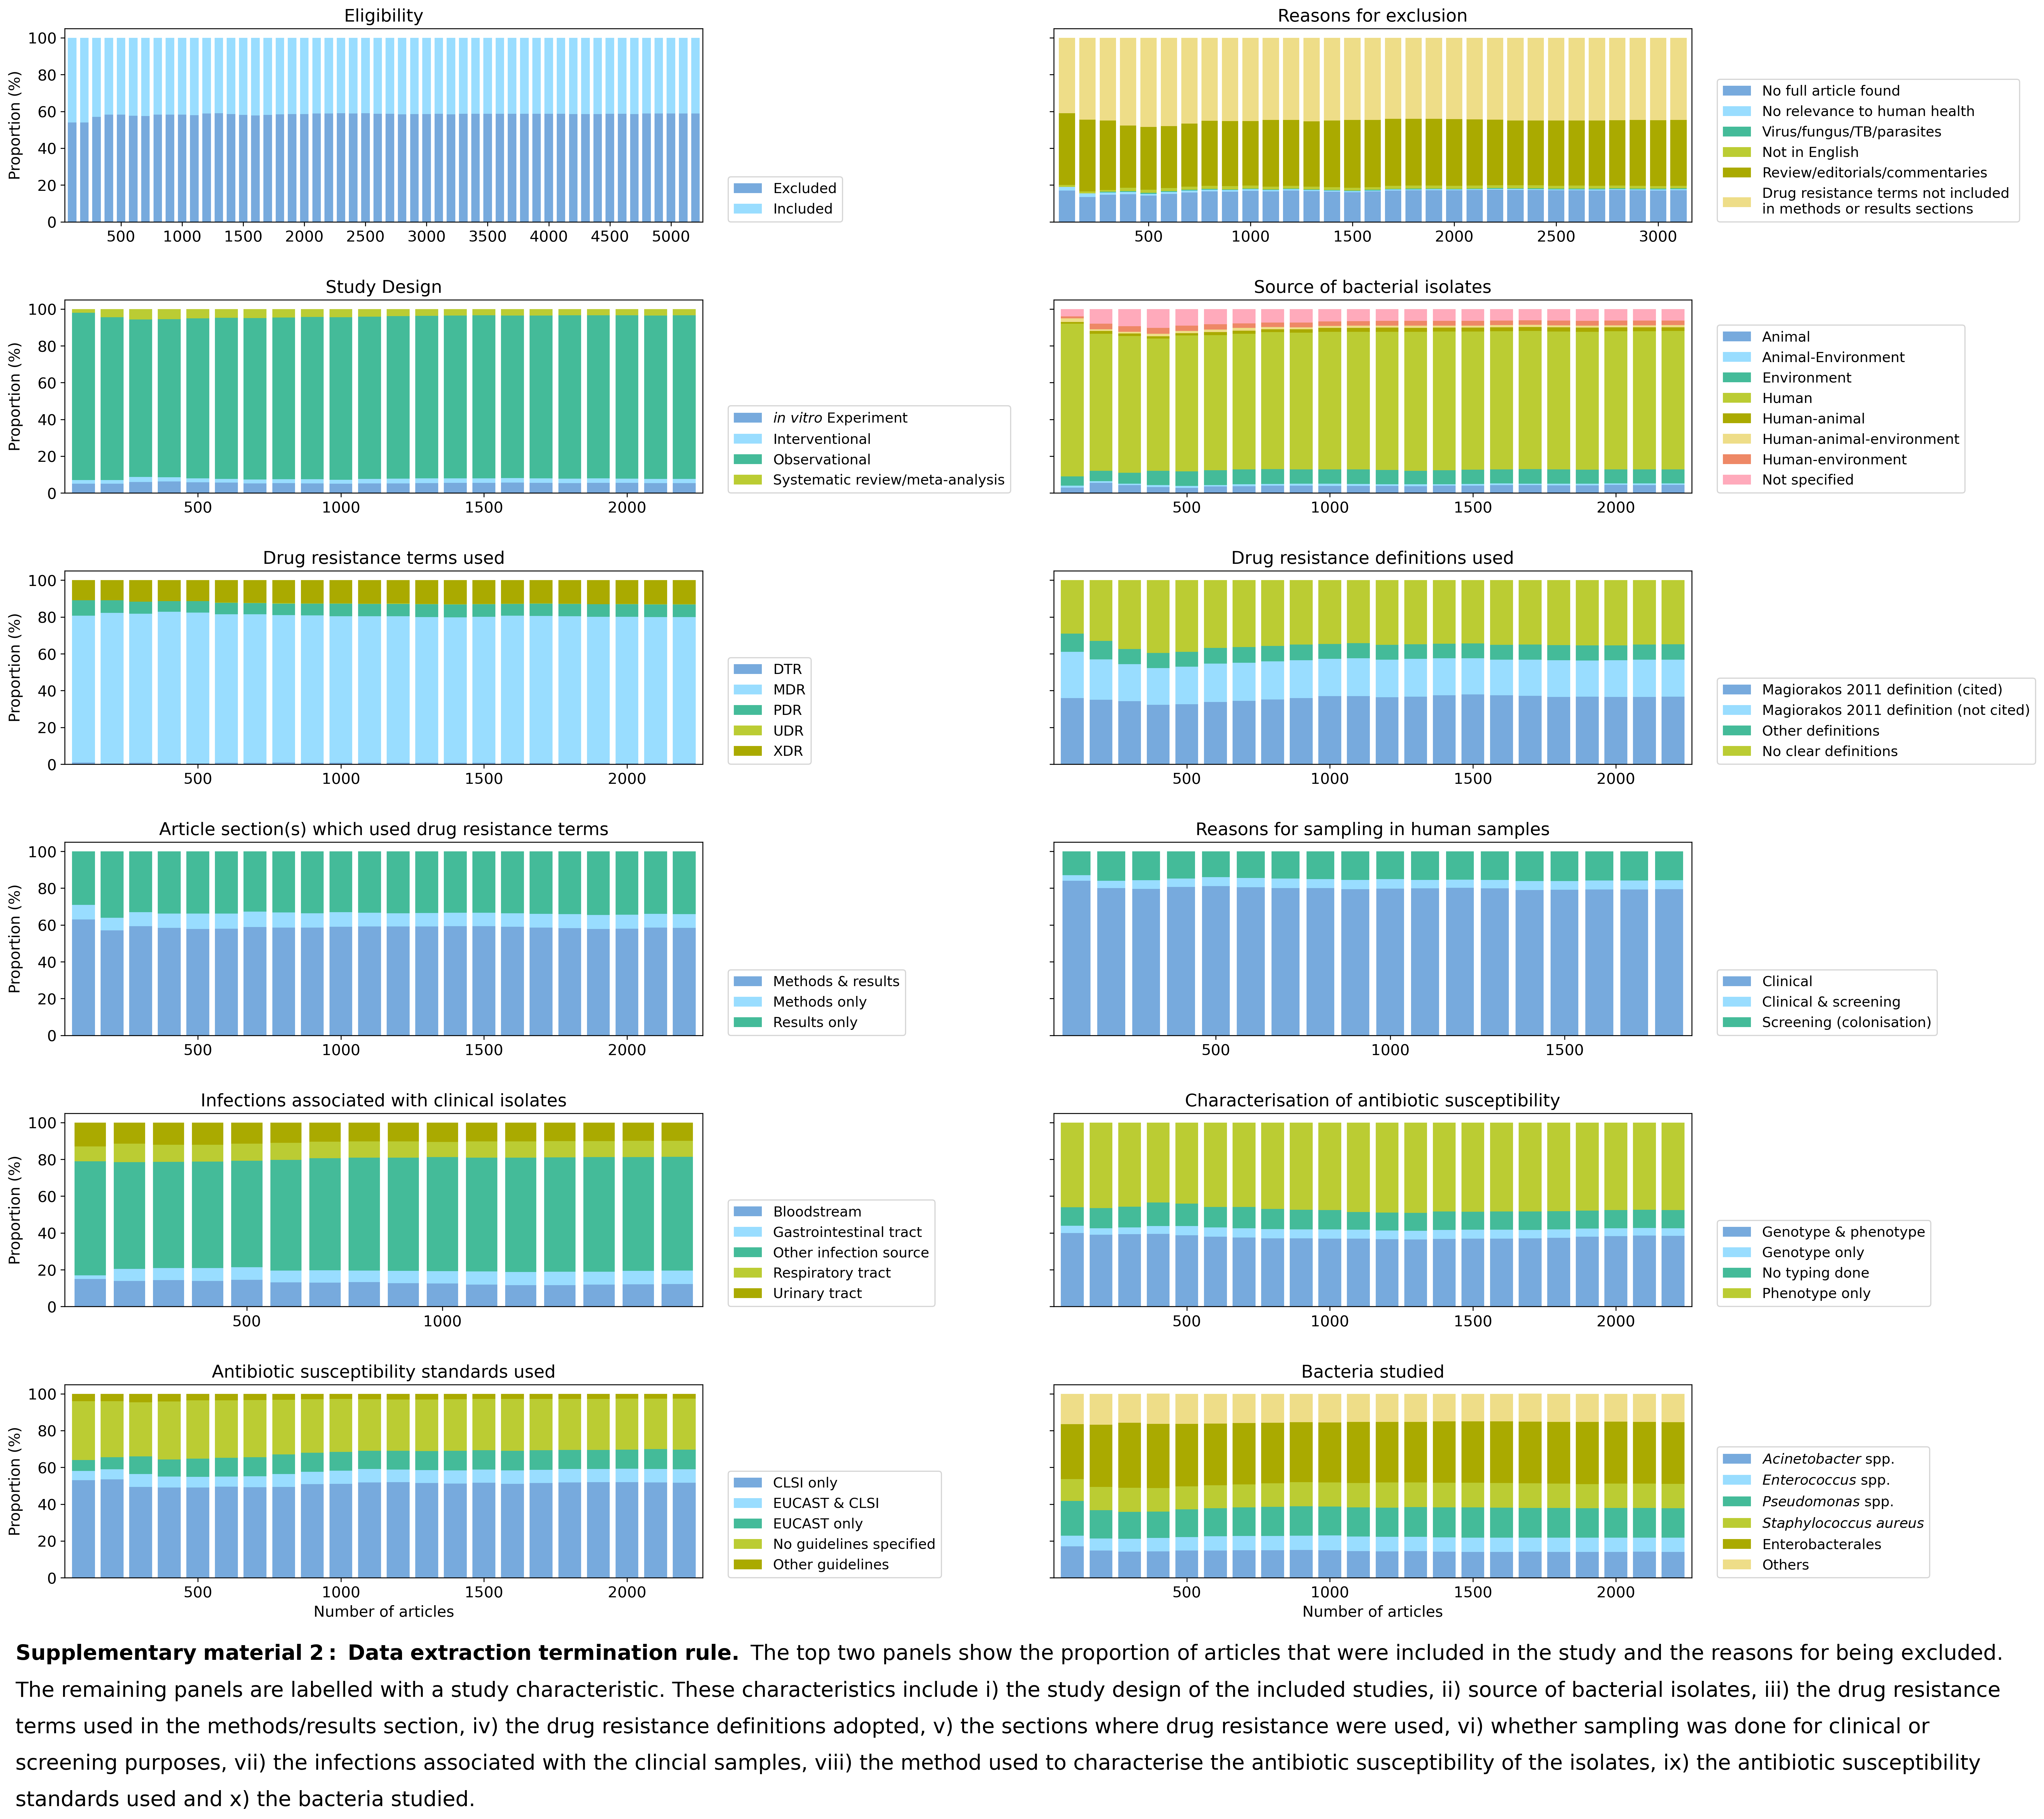

In [15]:
### Summary Trend (All) ###

# sns.set_palette("colorblind")
fig, axes = plt.subplots(6, 2, sharey = True,figsize = (25,20),dpi=300,constrained_layout = True)
data1.plot(ax = axes[0,0],kind='bar', stacked=True, width = 0.7,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data2.plot(ax = axes[0,1],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data3.plot(ax = axes[1,0],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data4.plot(ax = axes[1,1],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data5.plot(ax = axes[2,0],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data6.plot(ax = axes[2,1],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data7.plot(ax = axes[3,0],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data8.plot(ax = axes[3,1],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data9.plot(ax = axes[4,0],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data10.plot(ax = axes[4,1],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data11.plot(ax = axes[5,0],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data12.plot(ax = axes[5,1],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])

axes[0,0].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[0,1].legend(['No full article found', 'No relevance to human health', 'Virus/fungus/TB/parasites',
                  'Not in English', 'Review/editorials/commentaries','Drug resistance terms not included \nin methods or results sections'],
                 bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[1,0].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[1,1].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[2,0].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[2,1].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[3,0].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[3,1].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[4,0].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[4,1].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[5,0].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[5,1].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})

axes[0,0].title.set_text('Eligibility')
axes[0,0].title.set_size(15)
axes[0,1].title.set_text('Reasons for exclusion')
axes[0,1].title.set_size(15)
axes[1,0].title.set_text('Study Design')
axes[1,0].title.set_size(15)
axes[1,1].title.set_text('Source of bacterial isolates')
axes[1,1].title.set_size(15)
axes[2,0].title.set_text('Drug resistance terms used')
axes[2,0].title.set_size(15)
axes[2,1].title.set_text('Drug resistance definitions used')
axes[2,1].title.set_size(15)
axes[3,0].title.set_text('Article section(s) which used drug resistance terms')
axes[3,0].title.set_size(15)
axes[3,1].title.set_text('Reasons for sampling in human samples')
axes[3,1].title.set_size(15)
axes[4,0].title.set_text('Infections associated with clinical isolates')
axes[4,0].title.set_size(15)
axes[4,1].title.set_text('Characterisation of antibiotic susceptibility')
axes[4,1].title.set_size(15)
axes[5,0].title.set_text('Antibiotic susceptibility standards used')
axes[5,0].title.set_size(15)
axes[5,1].title.set_text('Bacteria studied')
axes[5,1].title.set_size(15)

axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation=0, fontsize = 13)
axes[0,0].set(xlabel = None, xticks = [4,9,14,19,24,29,34,39,44,49])
axes[0,0].set_ylabel('Proportion (%)', fontsize = 13)
axes[0,0].tick_params(labelsize = 13)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation=0, fontsize = 13)
axes[0,1].set(xlabel = None, xticks = [4,9,14,19, 24,29])
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation=0, fontsize = 13)
axes[1,0].set(xlabel = None, xticks = [4,9,14,19])
axes[1,0].set_ylabel('Proportion (%)', fontsize = 13)
axes[1,0].tick_params(labelsize = 13)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation=0, fontsize = 13)
axes[1,1].set(xlabel = None, xticks = [4,9,14,19])
axes[2,0].set_xticklabels(axes[2,0].get_xticklabels(),rotation=0, fontsize = 13)
axes[2,0].set(xlabel = None, xticks = [4,9,14,19])
axes[2,0].set_ylabel('Proportion (%)', fontsize = 13)
axes[2,0].tick_params(labelsize = 13)
axes[2,1].set_xticklabels(axes[2,1].get_xticklabels(),rotation=0, fontsize = 13)
axes[2,1].set(xlabel = None, xticks = [4,9,14,19])
axes[3,0].set_xticklabels(axes[3,0].get_xticklabels(),rotation=0, fontsize = 13)
axes[3,0].set(xlabel = None, xticks = [4,9,14,19])
axes[3,0].set_ylabel('Proportion (%)', fontsize = 13)
axes[3,0].tick_params(labelsize = 13)
axes[3,1].set_xticklabels(axes[3,1].get_xticklabels(),rotation=0, fontsize = 13)
axes[3,1].set(xlabel = None, xticks = [4,9,14])
axes[4,0].set_xticklabels(axes[4,0].get_xticklabels(),rotation=0, fontsize = 13)
axes[4,0].set(xlabel = None, xticks = [4,9])
axes[4,0].set_ylabel('Proportion (%)', fontsize = 13)
axes[4,0].tick_params(labelsize = 13)
axes[4,1].set_xticklabels(axes[4,1].get_xticklabels(),rotation=0, fontsize = 13)
axes[4,1].set(xlabel = None, xticks = [4,9,14,19])
axes[5,0].set_xticklabels(axes[5,0].get_xticklabels(),rotation=0, fontsize = 13)
axes[5,0].set(xticks = [4,9,14,19])
axes[5,0].set_ylabel('Proportion (%)', fontsize = 13)
axes[5,0].tick_params(labelsize = 13)
axes[5,0].set_xlabel('Number of articles',fontsize = 13)
axes[5,1].set_xticklabels(axes[5,1].get_xticklabels(),rotation=0, fontsize = 13)
axes[5,1].set(xticks = [4,9,14,19])
axes[5,1].set_xlabel('Number of articles',fontsize = 13)


# Figure caption

t = "$\mathbf{Supplementary}$ $\mathbf{material}$ $\mathbf{2:}$ $\mathbf{Data}$ $\mathbf{extraction}$ $\mathbf{termination}$ $\mathbf{rule.}$ The top two panels show the proportion of articles that were included in the study and the reasons for being excluded. \nThe remaining panels are labelled with a study characteristic. These characteristics include i) the study design of the included studies, ii) source of bacterial isolates, iii) the drug resistance \nterms used in the methods/results section, iv) the drug resistance definitions adopted, v) the sections where drug resistance were used, vi) whether sampling was done for clinical or \nscreening purposes, vii) the infections associated with the clincial samples, viii) the method used to characterise the antibiotic susceptibility of the isolates, ix) the antibiotic susceptibility \nstandards used and x) the bacteria studied."
fig.text(0.02,-0.09,t, fontsize = 18, linespacing = 2)

fig.tight_layout(pad=3.0)
fig.show()
# fig.savefig("summary trend (all).png",dpi=300,bbox_inches='tight',facecolor='w')

In [16]:
summary = pd.concat([data1temp.tail(2),data2temp.tail(6),data3temp.tail(4),data4temp.tail(8),
                  data5temp.tail(5),data6temp.tail(4),data7temp.tail(3),data8temp.tail(3),
                  data9temp.tail(5),data10temp.tail(4),data11temp.tail(5),data12temp.tail(6)])
summary

,Number of articles,Variable,Count,Proportion
102,5191,Excluded,3056,58.87
103,5191,Included,2135,41.13
180,3056,No full article found,524,17.15
181,3056,Non-bacterial infection,15,0.49
182,3056,Not english,44,1.44
183,3056,Review-editorial-opinion,1090,35.67
184,3056,No human implications,17,0.56
185,3056,Terms not used,1366,44.70
84,2135,Observational,1899,88.95
85,2135,In vitro experiment,114,5.34
